<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Step-1:-Load-the-Ames-Housing-Dataset" data-toc-modified-id="Step-1:-Load-the-Ames-Housing-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 1: Load the Ames Housing Dataset</a></span></li><li><span><a href="#Step-2:-Identify-Numeric-and-Categorical-Variables" data-toc-modified-id="Step-2:-Identify-Numeric-and-Categorical-Variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 2: Identify Numeric and Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Continuous-Numeric-Predictor" data-toc-modified-id="Continuous-Numeric-Predictor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Continuous Numeric Predictor</a></span></li><li><span><a href="#Discrete-Numeric-Predictor" data-toc-modified-id="Discrete-Numeric-Predictor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Discrete Numeric Predictor</a></span></li><li><span><a href="#String-Categorical-Predictor" data-toc-modified-id="String-Categorical-Predictor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>String Categorical Predictor</a></span></li><li><span><a href="#Discrete-Categorical-Predictor" data-toc-modified-id="Discrete-Categorical-Predictor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Discrete Categorical Predictor</a></span></li></ul></li><li><span><a href="#Step-3:-Build-a-Multiple-Regression-Model-with-Your-Chosen-Predictors" data-toc-modified-id="Step-3:-Build-a-Multiple-Regression-Model-with-Your-Chosen-Predictors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 3: Build a Multiple Regression Model with Your Chosen Predictors</a></span></li><li><span><a href="#Step-4:-Create-Partial-Regression-Plots-for-Features" data-toc-modified-id="Step-4:-Create-Partial-Regression-Plots-for-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 4: Create Partial Regression Plots for Features</a></span></li><li><span><a href="#Step-5:-Calculate-an-Error-Based-Metric" data-toc-modified-id="Step-5:-Calculate-an-Error-Based-Metric-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 5: Calculate an Error-Based Metric</a></span></li><li><span><a href="#Step-6:-Summarize-Findings" data-toc-modified-id="Step-6:-Summarize-Findings-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Step 6: Summarize Findings</a></span></li><li><span><a href="#Level-Up-(Optional)" data-toc-modified-id="Level-Up-(Optional)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Level Up (Optional)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [12]:
# Your code here - load the dataset
import pandas as pd 
import numpy as np 

ames = pd.read_csv("ames.csv", index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [13]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [37]:
# Your code here - drop columns with missing data
ames = ames.dropna(axis =1)
ames 

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [38]:
# Your code here - continuous numeric predictor

"""YearBuilt"""


'YearBuilt'

### Discrete Numeric Predictor

In [39]:
# Your code here - discrete numeric predictor

"""LotArea"""

'LotArea'

### String Categorical Predictor

In [40]:
# Your code here - string categorical predictor

"""Neighborhood"""

'Neighborhood'

### Discrete Categorical Predictor

In [41]:
# Your code here - discrete categorical predictor

"""OverallQual"""

'OverallQual'

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [83]:
# Your code here - prepare X and y, including one-hot encoding
y = ames["SalePrice"]
X_multiple = ames[["YearBuilt", "LotArea", "OverallQual"]]

X_multiple = pd.get_dummies(X_multiple, columns=["OverallQual"], drop_first=True, dtype=int)


In [28]:
# Your answer here - which category or categories were dropped?
""" Neighborhood"""

' Neighborhood'

In [84]:
# Your code here - build a regression model and display results

import statsmodels.api as sm 
model = sm.OLS(y,sm.add_constant(X_multiple))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     347.6
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        19:07:51   Log-Likelihood:                -17601.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1448   BIC:                         3.529e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.611e+05   9.21e+04     -7.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

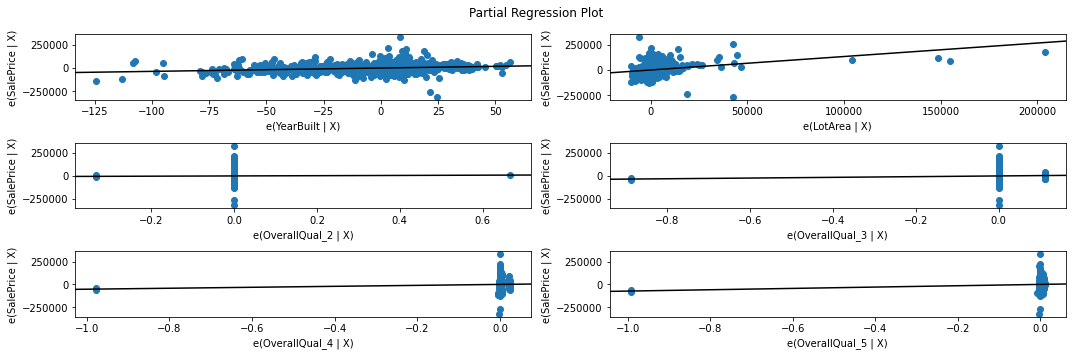

In [85]:
# Your code here - create partial regression plots

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(result, exog_idx=["YearBuilt", "LotArea","OverallQual_2", "OverallQual_3", "OverallQual_4","OverallQual_5"], fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [90]:
# Your code here - calculate an error-based metric

y = ames["SalePrice"]
y_pred = results.predict(X)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y,y_pred) 


27520.961196066262

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = results.predict(X)
y_pred

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 27520.96
RMSE: 41622.01


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np


# Load your data 
y = ames["SalePrice"]
X = ames[["LotArea", "GarageCars", "OverallQual"]]

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 30796.73
Root Mean Squared Error (RMSE): 48507.37


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data
X = ames[["YearBuilt", "LotArea", "OverallQual"]]
X = pd.get_dummies(X, columns=["OverallQual"], drop_first=True, dtype=int)
X = sm.add_constant(X)
y = ames["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model on training data
result = sm.OLS(y_train, X_train).fit()

# Predict on test data
y_pred = result.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Test Set MAE: ${mae:.2f}")

Test Set MAE: $27718.92


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [94]:

print(y_test.mean())

"""Let’s say the average house price in the test set is around $180,000 (typical for Ames data). Then:

MAE is about 17% of the average price:

30
,
797
180
,
000
≈
0.17
180,000
30,797
​
 ≈0.17
RMSE is about 27% of the average price:

48
,
507
180
,
000
≈
0.27
180,000
48,507
​
 ≈0.27
    
    
#What This Tells You:
Your model is decent, but there's room for improvement.

A 17–27% error range is typical for basic linear regression on housing data with just 3 features.

You can likely reduce error by:

Adding more predictive features (e.g. Neighborhood, YearBuilt, GrLivArea)

Dealing with outliers (try removing extreme SalePrice or LotArea values)

Using nonlinear models like Random Forest, Gradient Boosting, etc."""

178839.81164383562


"Let’s say the average house price in the test set is around $180,000 (typical for Ames data). Then:\n\nMAE is about 17% of the average price:\n\n30\n,\n797\n180\n,\n000\n≈\n0.17\n180,000\n30,797\n\u200b\n ≈0.17\nRMSE is about 27% of the average price:\n\n48\n,\n507\n180\n,\n000\n≈\n0.27\n180,000\n48,507\n\u200b\n ≈0.27\n    \n    \n#What This Tells You:\nYour model is decent, but there's room for improvement.\n\nA 17–27% error range is typical for basic linear regression on housing data with just 3 features.\n\nYou can likely reduce error by:\n\nAdding more predictive features (e.g. Neighborhood, YearBuilt, GrLivArea)\n\nDealing with outliers (try removing extreme SalePrice or LotArea values)\n\nUsing nonlinear models like Random Forest, Gradient Boosting, etc."

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [95]:
# Your code here
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np


# Load your data 
y = ames["SalePrice"]
X = ames[["LotArea", "GarageCars", "OverallQual"]]

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 30796.73
Root Mean Squared Error (RMSE): 48507.37


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.